In [147]:
import cv2 # should be 4.7
import glob
import matplotlib.pyplot as plt
import numpy as np

print( cv2.__version__)

4.7.0


In [148]:
# OUR FINAL CAMERA CALIBRATION MATRIX
calibration = 0.6442544274536695
cameraMatrix = np.array([[932.35252209,   0.,         657.24325896],
 [  0.,         930.23581552, 357.42939289],
 [  0.,           0.,           1.        ]])
distCoeffs = np.array([[ 1.76279343e-01, -6.07952723e-01, -4.64176532e-04, -4.96839648e-04, 6.04867450e-01]])

In [149]:
RELATIVE_PATH_CUBE = './*.jpg'
images_cube = sorted(glob.glob(RELATIVE_PATH_CUBE))
print(len(images_cube))

points3dOnCube = np.array([
    [[0.0, 1.3, 24.3],
     [9.0, 1.3, 24.3],
     [9.0, 1.3, 38.8],
     [0.0, 1.3, 38.8],
     [0.0, -0.7, 24.3],
     [9.0, -0.7, 24.3],
     [9.0, -0.7, 38.8],
     [0.0, -0.7, 38.8]],
     [[0.0, 1.3, 24.3],
     [9.0, 1.3, 24.3],
     [9.0, 1.3, 38.8],
     [0.0, 1.3, 38.8],
     [0.0, -0.7, 24.3],
     [9.0, -0.7, 24.3],
     [9.0, -0.7, 38.8],
     [0.0, -0.7, 38.8]]
])



2


point_2d:   [[[657 405]]

 [[993 406]]

 [[870 388]]

 [[657 388]]

 [[657 332]]

 [[993 331]]

 [[870 341]]

 [[657 341]]]


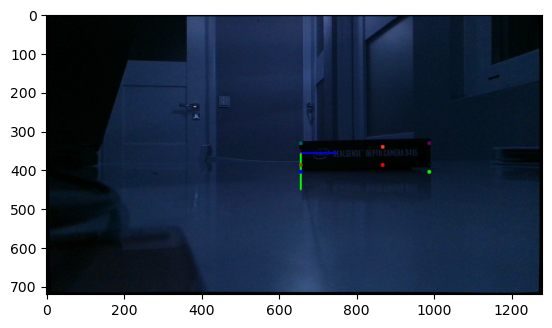

point_2d:   [[[657 405]]

 [[993 406]]

 [[870 388]]

 [[657 388]]

 [[657 332]]

 [[993 331]]

 [[870 341]]

 [[657 341]]]


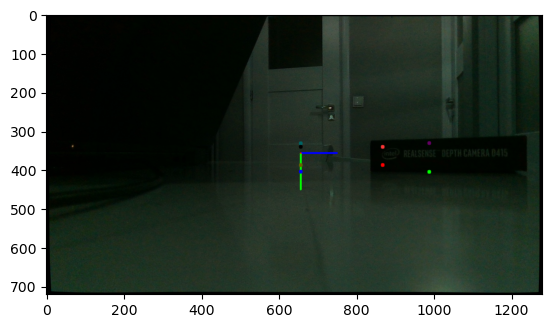

In [150]:
count = 0
all_points = []
for i in range(len(images_cube)):
    if i <= 100:
        points3dOnCube1 = points3dOnCube[i]
        img = cv2.imread(images_cube[i])
        
        img = cv2.drawFrameAxes(img, cameraMatrix, distCoeffs, np.array([0.0, 0.0, 0.0]), np.array([0.0, 0.0, 1.0]), 0.1) # draw the chessboard coordinate system

        # project the 3D point onto the image
        point_2d, _ = cv2.projectPoints(points3dOnCube1, np.array([0.0, 0.0, 0.0]), np.array([0.0, 0.0, 1.0]), cameraMatrix, distCoeffs)

        # round the pixel coordinates to integers
        point_2d = np.round(point_2d).astype(np.int32)
        
        print("point_2d:  ", point_2d)
        all_points.append(point_2d)
        colors=[(0, 0, 255), (0, 255, 0), (255, 0, 0), (100, 100, 0), (0, 100, 100), (100, 0, 100), (255, 55, 55), (0, 0, 0), (0, 0, 0)]
    
        c = 0
        for x, y in point_2d[:,0,:]:
            img = cv2.circle(img, (x, y), radius=5, color=colors[c], thickness=-1)
            c += 1

        img = cv2.undistort(img, cameraMatrix, distCoeffs, None, cameraMatrix) # undistort the image (get's crazy)

        # uncomment this to see the result!
        plt.imshow(img)
        plt.show()
    
    count += 1

In [151]:
points1 = np.array(all_points[2]); points2 = np.array(all_points[0])

print("points1 = np.array([", end = "")
for i in range(points1.shape[0]):
    print("[", end = ""); print(points1[i][0][0], end = ", "); print(points1[i][0][1], end = "], ")
print("])")

print("points2 = np.array([", end = "")
for i in range(points2.shape[0]):
    print("[", end = ""); print(points2[i][0][0], end = ", "); print(points2[i][0][1], end = "], ")
print("])")

IndexError: list index out of range